In [1]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image

def makeTrainData(path="gdrive/MyDrive/detect_imgs_results/"):
    X = []
    for file in os.listdir(path):
        imgpath = path+file
        img = Image.open(imgpath)
        img = np.array(img)
        img = np.resize(img, (160, 160, 3))
        X.append(img)
    return np.array(X)


In [3]:
!gdown --id 1PZ_6Zsy1Vb0s0JmjEmVd8FS99zoMCiN1

Downloading...
From: https://drive.google.com/uc?id=1PZ_6Zsy1Vb0s0JmjEmVd8FS99zoMCiN1
To: /content/facenet_keras.h5
92.4MB [00:05, 17.5MB/s]


In [4]:
import tensorflow as tf
import tensorflow.keras as keras
import sklearn

In [5]:
model = keras.models.load_model("facenet_keras.h5")
print(model.inputs)
print(model.outputs)

[<KerasTensor: shape=(None, 160, 160, 3) dtype=float32 (created by layer 'input_1')>]
[<KerasTensor: shape=(None, 128) dtype=float32 (created by layer 'Bottleneck_BatchNorm')>]


In [6]:
def getEmbeddings(model, data):
    return model.predict(data)


In [7]:
def getPaths(path="gdrive/MyDrive/detect_imgs_results/"):
    paths = []
    for f in os.listdir(path):
        newpath = path+f
        paths.append(newpath)

    return paths
    

def openImage(path):
    img = Image.open(path)
    img = np.array(img)
    return img


paths = getPaths()
print(len(paths))

12913


In [8]:
import concurrent

with concurrent.futures.ThreadPoolExecutor(max_workers=20) as exec:
    X = exec.map(openImage, paths)

print(X)

<generator object Executor.map.<locals>.result_iterator at 0x7f241857dcd0>


In [9]:
for i in X:
    print(i.shape)
    break


(160, 160, 3)


In [10]:
x = X
train = np.stack(x)
print(train.shape)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if self.run_code(code, result):


(12912, 160, 160, 3)


In [11]:

embeddings = getEmbeddings(model, train)

In [12]:
print(embeddings.shape)

(12912, 128)


In [13]:
import random
import scipy
from scipy.spatial import distance

d = 0
for i in range(embeddings.shape[0]):
    c1 = random.choice(embeddings)
    c2 = random.choice(embeddings)
    d += distance.euclidean(c1, c2)
d = d / int(embeddings.shape[0])
print(d)

7.003653828456278


In [14]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

eps = []
uniques = []
for i in range(0, 10):
    try:
        db = DBSCAN(eps=i).fit(embeddings)
        dbLabels = db.labels_
        print(metrics.silhouette_score(embeddings, dbLabels))
        eps.append(i)
        uniques.append(np.unique(dbLabels))
    except:
        continue




-0.11559081
-0.4188386
-0.06834812
0.26237172
0.5815534
0.65640384
0.7334303
0.7406356


In [15]:
print(uniques)
for i in uniques:
    print(i, "\n")

[array([-1,  0]), array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
       50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66,
       67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83,
       84, 85, 86, 87, 88, 89]), array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16]), array([-1,  0,  1,  2,  3,  4]), array([-1,  0]), array([-1,  0]), array([-1,  0]), array([-1,  0])]
[-1  0] 

[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46
 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70
 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89] 

[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16] 

[-1  0  1  2  3  4] 

[-1  0] 

[-1  

In [16]:
print(np.unique(dbLabels))

[0]


In [17]:
db = DBSCAN(eps=2).fit(embeddings)
dbLabels = db.labels_
print(metrics.silhouette_score(embeddings, dbLabels))


-0.4188386


In [18]:
print(dbLabels)
print(np.unique(dbLabels))

[-1 -1 -1 ... -1 -1  0]
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46
 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70
 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89]


In [19]:
store = []
for i in range(90):
    store.append(np.where(dbLabels == i))

print(store[0])


(array([  151,   153,   155, ..., 12882, 12897, 12911]),)


(160, 160, 3)


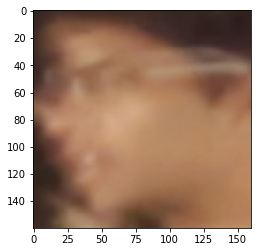

(160, 160, 3)


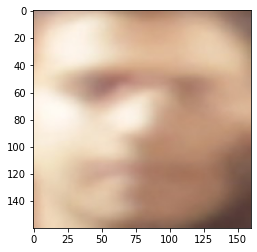

(160, 160, 3)


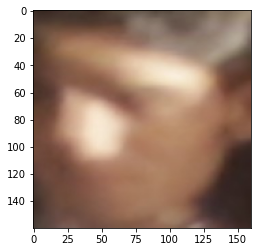

(160, 160, 3)


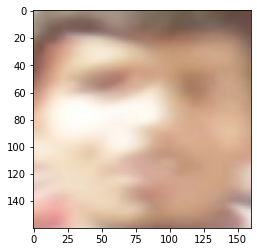


(160, 160, 3)


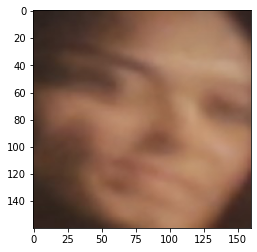

(160, 160, 3)


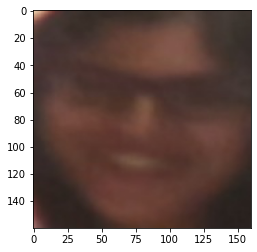

(160, 160, 3)


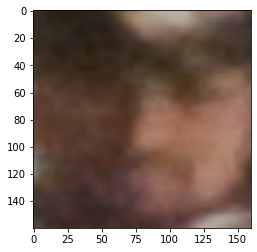

(160, 160, 3)


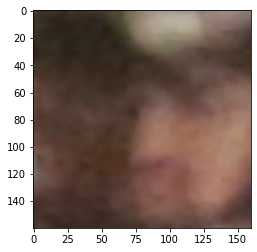


(160, 160, 3)


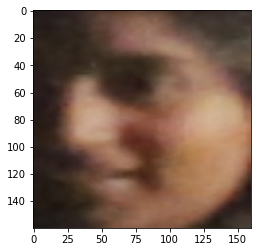

(160, 160, 3)


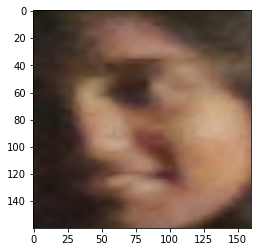

(160, 160, 3)


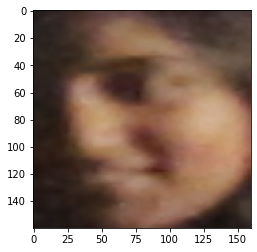

(160, 160, 3)


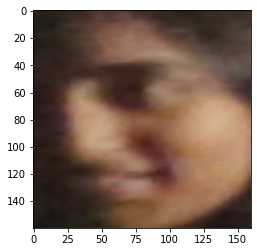


(160, 160, 3)


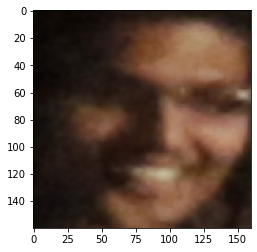

(160, 160, 3)


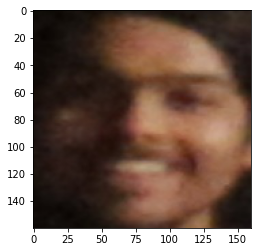

(160, 160, 3)


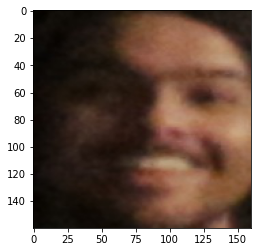

(160, 160, 3)


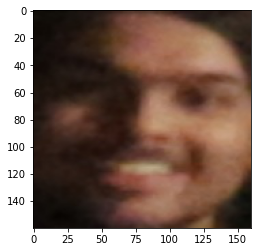


(160, 160, 3)


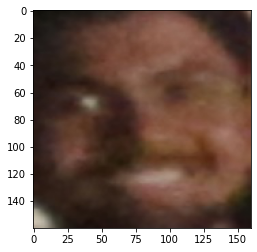

(160, 160, 3)


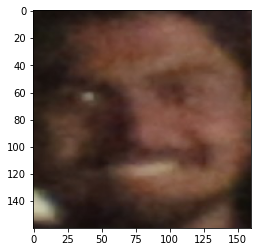

(160, 160, 3)


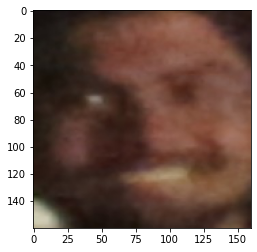

(160, 160, 3)


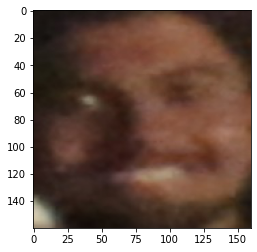


(160, 160, 3)


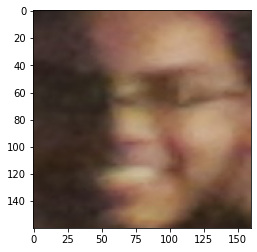

(160, 160, 3)


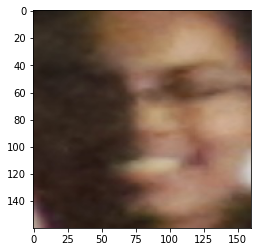

(160, 160, 3)


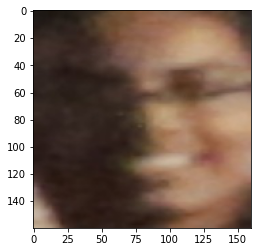

(160, 160, 3)


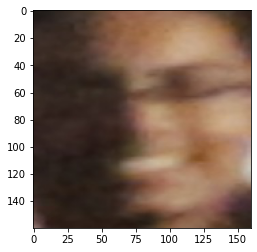


(160, 160, 3)


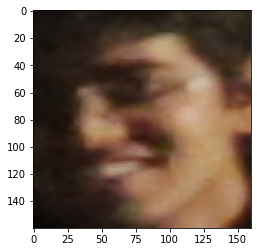

(160, 160, 3)


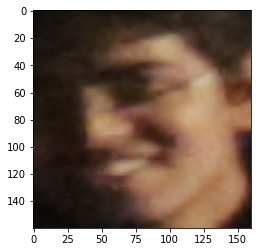

(160, 160, 3)


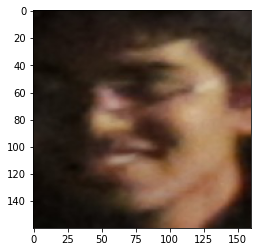

(160, 160, 3)


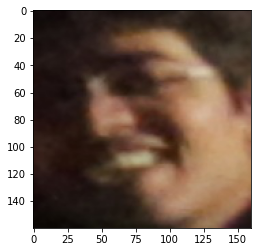


(160, 160, 3)


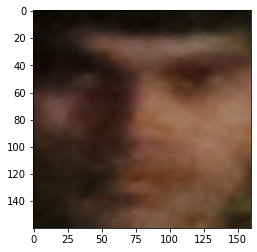

(160, 160, 3)


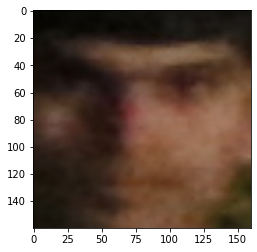

(160, 160, 3)


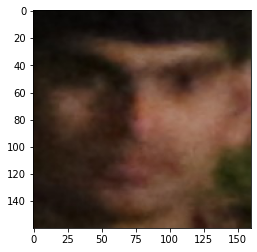

(160, 160, 3)


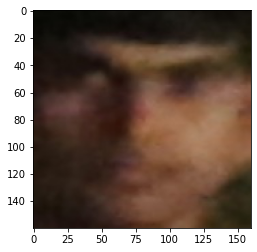


(160, 160, 3)


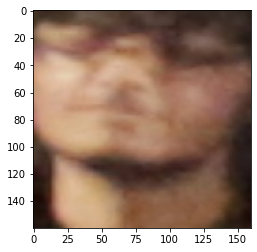

(160, 160, 3)


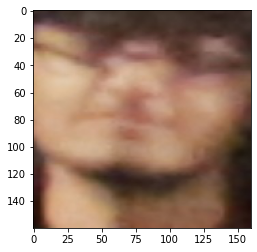

(160, 160, 3)


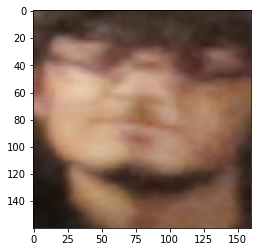

(160, 160, 3)


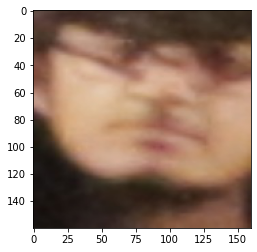


(160, 160, 3)


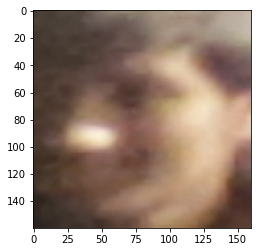

(160, 160, 3)


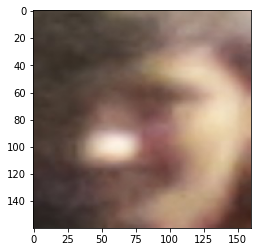

(160, 160, 3)


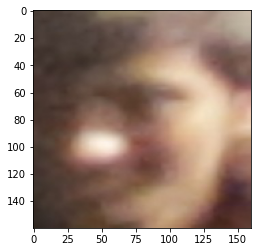

(160, 160, 3)


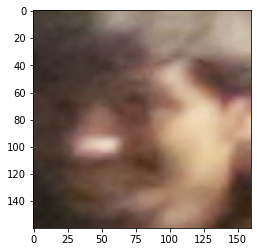

In [20]:
for j in range(10):
    for i in range(4):
        idx = store[j][0][i]
        img = train[idx]
        print(img.shape)
        plt.imshow(img)
        plt.show()
    print("==============================================================================\n")


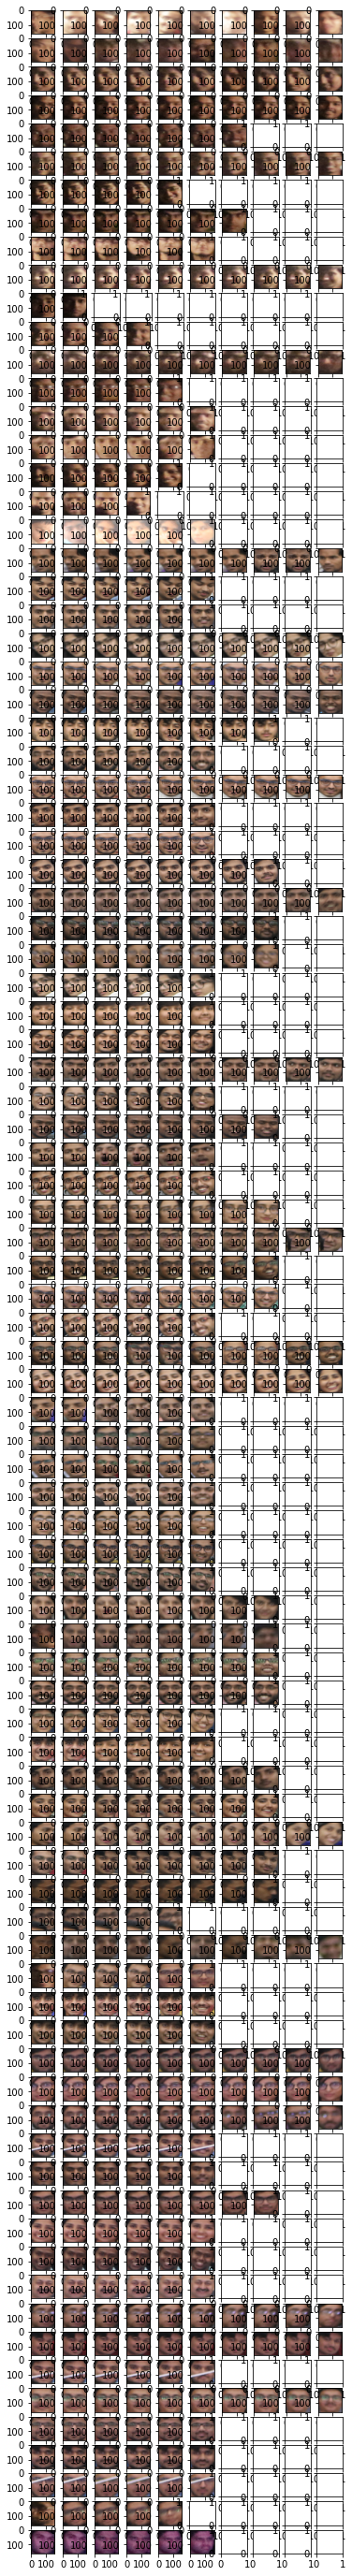

In [32]:
fig, ax = plt.subplots(90, 10)
fig.set_figheight(50)

c = 0
for i in range(90):
    for j in range(10):
        try:
            ax[i][j].imshow(np.array(train[store[i][0][j]]))
        except:
            break
    c+=1


plt.show()
fig.savefig("test.png")